Our parameters will be host_response rate, host_acceptance_rate,neighbour cleansed, property_type, room type, accommodates, bathrooms,number_of_reviews, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, price

In [3]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.neighbors import KNeighborsRegressor

In [5]:
!pip install spacy

In [6]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 12.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
nlp = spacy.load("en_core_web_md")

In [8]:
nlp2 = spacy.load("en_core_web_md")

In [9]:
gruplar = {"Boat":[], "Home":[], "Villa":[], "Apartment":[], "Hotel":[],"Hostel":[], "Others":[]}

In [10]:
room_grups = {"Private Room":[], "Shared Room":[], "Entire":[], "Others":[]}

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# Load the dataset (assuming it has been loaded into a DataFrame 'df')
df = pd.read_csv('data.csv')  # Replace with actual path

# Data Preprocessing
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df["price"] = df["price"].fillna(df["price"].median()).astype(float)
df['number_of_reviews'] = df['number_of_reviews'].fillna(df["number_of_reviews"].median()).astype(int)
df['beds'] = df['beds'].fillna(df["beds"].median()).astype(float)
df['accommodates'] = df['accommodates'].fillna(df['accommodates'].median()).astype(float)

# Handle '%' in 'host_response_rate' even if there are missing values
df["host_response_rate"] = df["host_response_rate"].str.replace("%", "", regex=True).astype(float)
df["host_response_rate"] = df["host_response_rate"].fillna(df["host_response_rate"].median()).astype(float)

# Handle '%' in 'host_acceptance_rate' even if there are missing values
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace("%", "", regex=True).astype(float)
df["host_acceptance_rate"] = df["host_acceptance_rate"].fillna(df["host_acceptance_rate"].median()).astype(float)

# Handle missing values in 'review_scores_rating'
#df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].median()).astype(float)
#df['review_scores_accuracy'] = df['review_scores_accuracy'].fillna(df['review_scores_accuracy'].median()).astype(float)
#df['review_scores_cleanliness'] = df['review_scores_cleanliness'].fillna(df['review_scores_cleanliness'].median()).astype(float)
#df['review_scores_checkin'] = df['review_scores_checkin'].fillna(df['review_scores_checkin'].median()).astype(float)
#df['review_scores_communication'] = df['review_scores_communication'].fillna(df['review_scores_communication'].median()).astype(float)
#df['review_scores_location'] = df['review_scores_location'].fillna(df['review_scores_location'].median()).astype(float)
#df['review_scores_value'] = df['review_scores_value'].fillna(df['review_scores_value'].median()).astype(float)

review_score_columns = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value'
]

for column in review_score_columns:
    df[column] = df[column].fillna(df[column].median()).astype(float)

# Handle missing values in 'bathrooms_text'

df['bathrooms'] = df['bathrooms_text'].str.extract('(\d+)', expand=False).astype(float)

df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median()).astype(float)
num_na = df['bathrooms'].isna().sum()
print(f"Number of NA values in 'bathrooms': {num_na}")
"""
prop = []
room = []
neighbourhood = []
for i in df["property_type"].unique():
  prop.append(i)
  print(i)
print("--------------------------")
for i in df["room_type"].unique():
  room.append(i)
  print(i)
print("--------------------------")
for i in df["neighbourhood_cleansed"].unique():
  neighbourhood.append(i)
  print(i)
print("--------------------------")
"""
"""
categorical_features = ["host_verifications","host_response_time",'neighbourhood_cleansed', 'room_type']
current_id = 0  # Initialize a global ID counter

for element in categorical_features:
    print(f"Unique values for {element}:")
    for i in df[element].unique():
        print(i)

    # Convert to categorical and assign unique IDs
    df[element] = df[element].astype('category')
    df[element] = df[element].cat.codes + current_id  # Add current_id to ensure unique IDs
    current_id += len(df[element].unique())  # Update current_id for the next category

"""
#similarity_threshold = 0  # Set your desired threshold

groups = []  # Initialize a list to store groups
processed_phrases = []  # Keep track of phrases already assigned to groups
phrases = df["property_type"].unique().tolist()
for phrase in phrases:
  phrases[phrases.index(phrase)] = phrase.lower()
print(phrases)
print("--------------------------")
df["property_type"] = df["property_type"].str.lower()

for phrase in phrases:
  if phrase.__contains__("home"):
    gruplar["Home"].append(phrase)
    continue
  elif phrase.__contains__("boat"):
    gruplar["Boat"].append(phrase)
    continue
  elif phrase.__contains__("house"):
    gruplar["Home"].append(phrase)
    continue
  elif phrase.__contains__("condo"):
    gruplar["Apartment"].append(phrase)
    continue
  elif phrase.__contains__("villa"):
    gruplar["Villa"].append(phrase)
    continue
  elif phrase.__contains__("apartment"):
    gruplar["Apartment"].append(phrase)
    continue
  elif phrase.__contains__("hotel"):
    gruplar["Hotel"].append(phrase)
    continue
  elif phrase.__contains__("suite"):
    gruplar["Apartment"].append(phrase)
    continue
  elif phrase.__contains__("hostel"):
    gruplar["Hostel"].append(phrase)
    continue
  else:
    gruplar["Others"].append(phrase)

#Classify room types
rooms = df["room_type"].unique().tolist()
for room in rooms:
  rooms[rooms.index(room)] = room.lower()

print(rooms)
print("--------------------------")

df["room_type"] = df["room_type"].str.lower()

for room in rooms:
  if room.__contains__("private"):
    room_grups["Private Room"].append(room)
    continue
  elif room.__contains__("shared"):
    room_grups["Shared Room"].append(room)
    continue
  elif room.__contains__("entire"):
    room_grups["Entire"].append(room)
    continue
  else:
    room_grups["Others"].append(room)

"""
for phrase in phrases: #iterate over our actual phrases (the originals)
    max_percentage = 0 #set max percentage to 0 so we can change it as we progress.
    #word_vector = nlp.vocab.vectors[nlp.vocab.strings[phrase]]
    doc1 = nlp(phrase) #create doc1 object
    if phrase in processed_phrases: #check if we already used that phrase.
        break #if so, continue to the next phrase because we already used that.
    mylist = []
    for grup_name in list(dict.fromkeys(gruplar)): #for loop iterting over list in our grups [labels/].
      #word_vector = nlp.vocab.vectors[nlp.vocab.strings[grup_name]]
      doc2 = nlp2(grup_name) #create doc2 object for the grup_name (label)

      temp = doc1.similarity(doc2) #mesuare their similarity.
      mylist.append((temp, grup_name)) #append it to a list.

      #print(f"The best phrase: {best_phrase}, and its percentage: {max_percentage} with the {grup_name}")
    val = max(mylist)
    best_phrase = val[1]
    max_percentage = val[0]
    gruplar[best_phrase].append(phrase)
    print(f"The best phrase: {best_phrase}, and its percentage: {max_percentage}")
    processed_phrases.append(phrase)
"""
print(gruplar)

# Function to replace values based on the dictionary
def replace_values(cell, gruplar):
    for key, value in gruplar.items():
        for item in value:
            if item.lower() in cell.lower():
                return key.lower()
    return cell

# Function to replace values of room type based on the dictionary
def replace_values_of_rooms(cell, room_grups):
    for key, value in room_grups.items():
        for item in value:
            if item.lower() in cell.lower():
                return key.lower()
    return cell

#replacement for the property_type column.
df["property_type"] = df["property_type"].apply(lambda x: replace_values(x, gruplar))

df["room_type"] = df["room_type"].apply(lambda x: replace_values_of_rooms(x, room_grups))
features = df.drop(columns=['id', 'host_id', 'host_name', 'host_about', 'price', 'bathrooms_text',"host_response_time","host_response_rate"])

df.head(50)
# One-Hot encode categorical features
categorical_features = ["property_type", "host_verifications", 'room_type', "neighbourhood_cleansed"]
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[categorical_features])

numerical_features = features.drop(columns=categorical_features)
features = pd.concat([numerical_features,
                       pd.DataFrame(encoded_features,
                                    columns=encoder.get_feature_names_out(categorical_features))],
                      axis=1)
target = df['price']





Number of NA values in 'bathrooms': 0
['entire condo', 'entire home', 'entire rental unit', 'houseboat', 'room in hostel', 'private room in guesthouse', 'private room in bed and breakfast', 'room in boutique hotel', 'private room in loft', 'room in hotel', 'private room in home', 'private room in boat', 'private room in rental unit', 'room in aparthotel', 'private room in condo', 'private room in townhouse', 'boat', 'entire villa', 'entire guest suite', 'entire loft', 'private room in houseboat', 'entire serviced apartment', 'entire townhouse', 'private room in casa particular', 'private room in guest suite', 'shared room in condo', 'shared room in hostel', 'entire guesthouse', 'entire place', 'entire vacation home', 'private room in hostel', 'shared room in guesthouse', 'room in bed and breakfast', 'barn', 'private room in serviced apartment', 'private room in villa', 'private room', 'shared room in home', 'private room in tiny home', 'tiny home', 'entire cottage', 'entire cabin', 'pr

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
print(target)

0       232.0
1       120.0
2       170.0
3       200.0
4       265.0
        ...  
8734    500.0
8735    400.0
8736    270.0
8737    275.0
8738    250.0
Name: price, Length: 8739, dtype: float64


In [13]:
print(features.columns)

Index(['host_acceptance_rate', 'accommodates', 'beds', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'bathrooms', 'property_type_apartment',
       'property_type_boat', 'property_type_home', 'property_type_hostel',
       'property_type_hotel', 'property_type_others', 'property_type_villa',
       'host_verifications_['email', 'phone', 'photographer']',
       'host_verifications_['email', 'phone', 'work_email']',
       'host_verifications_['email', 'phone']',
       'host_verifications_['email', 'work_email']',
       'host_verifications_['email']',
       'host_verifications_['phone', 'work_email']',
       'host_verifications_['phone']', 'host_verifications_[]',
       'room_type_entire', 'room_type_others', 'room_type_private room',
       'room_type_shared room', 'neighbourhood_cleansed_Bijlmer-

In [14]:
print(room_grups)



{'Private Room': ['private room'], 'Shared Room': ['shared room'], 'Entire': ['entire home/apt'], 'Others': ['hotel room']}


In [15]:
print(gruplar)

{'Boat': ['houseboat', 'private room in boat', 'boat', 'private room in houseboat', 'shared room in houseboat', 'shared room in boat'], 'Home': ['entire home', 'private room in guesthouse', 'private room in home', 'private room in townhouse', 'entire townhouse', 'entire guesthouse', 'entire vacation home', 'shared room in guesthouse', 'shared room in home', 'private room in tiny home', 'tiny home', 'private room in earthen home', 'private room in vacation home'], 'Villa': ['entire villa', 'private room in villa'], 'Apartment': ['entire condo', 'private room in condo', 'entire guest suite', 'entire serviced apartment', 'private room in guest suite', 'shared room in condo', 'private room in serviced apartment', 'room in serviced apartment'], 'Hotel': ['room in boutique hotel', 'room in hotel', 'room in aparthotel', 'shared room in hotel'], 'Hostel': ['room in hostel', 'shared room in hostel', 'private room in hostel'], 'Others': ['entire rental unit', 'private room in bed and breakfast',

In [16]:
df["property_type"].head(50)

0     apartment
1          home
2        others
3        others
4          home
5        others
6          boat
7        others
8     apartment
9        others
10    apartment
11       others
12       others
13       hostel
14       others
15       others
16       others
17         home
18       others
19    apartment
20         home
21       others
22    apartment
23       others
24         home
25       others
26         home
27         home
28       others
29       others
30       others
31       others
32       others
33       others
34       others
35    apartment
36       others
37       others
38        hotel
39       others
40       others
41       others
42        hotel
43       others
44    apartment
45       others
46    apartment
47         home
48    apartment
49         home
Name: property_type, dtype: object

In [17]:
df["room_type"].head(50)

0           entire
1           entire
2           entire
3           entire
4           entire
5           entire
6           entire
7           entire
8           entire
9           entire
10          entire
11          entire
12          entire
13          others
14          entire
15          entire
16          entire
17          entire
18          entire
19          entire
20          entire
21          entire
22          entire
23          entire
24          entire
25          entire
26          entire
27    private room
28          entire
29          entire
30          entire
31          entire
32          entire
33          entire
34    private room
35          entire
36          entire
37          entire
38    private room
39          entire
40    private room
41          entire
42    private room
43          entire
44          entire
45          entire
46          entire
47          entire
48          entire
49    private room
Name: room_type, dtype: object

In [18]:
features.head(50)

,host_acceptance_rate,accommodates,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,...,neighbourhood_cleansed_Noord-Oost,neighbourhood_cleansed_Noord-West,neighbourhood_cleansed_Oostelijk Havengebied - Indische Buurt,neighbourhood_cleansed_Osdorp,neighbourhood_cleansed_Oud-Noord,neighbourhood_cleansed_Oud-Oost,neighbourhood_cleansed_Slotervaart,neighbourhood_cleansed_Watergraafsmeer,neighbourhood_cleansed_Westerpark,neighbourhood_cleansed_Zuid
0,86.0,2.0,1.0,5,4.60,4.60,4.40,4.40,4.60,4.60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,50.0,4.0,2.0,6,5.00,4.67,4.83,4.83,5.00,4.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,83.0,4.0,2.0,51,4.71,4.80,4.65,4.87,4.96,4.57,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18.0,2.0,1.0,43,4.86,4.95,4.93,4.95,4.98,5.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60.0,3.0,2.0,5,5.00,5.00,5.00,5.00,5.00,5.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,88.0,2.0,1.0,7,4.86,4.57,4.57,4.86,4.86,5.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,75.0,2.0,1.0,13,4.92,4.92,4.69,5.00,5.00,5.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,88.0,2.0,1.0,0,4.91,4.92,4.87,4.96,5.00,4.87,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,73.0,4.0,2.0,12,4.92,5.00,5.00,5.00,4.92,5.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,100.0,3.0,2.0,17,4.59,4.65,4.53,4.94,4.94,4.65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
print(features.columns)

Index(['host_acceptance_rate', 'accommodates', 'beds', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'bathrooms', 'property_type_apartment',
       'property_type_boat', 'property_type_home', 'property_type_hostel',
       'property_type_hotel', 'property_type_others', 'property_type_villa',
       'host_verifications_['email', 'phone', 'photographer']',
       'host_verifications_['email', 'phone', 'work_email']',
       'host_verifications_['email', 'phone']',
       'host_verifications_['email', 'work_email']',
       'host_verifications_['email']',
       'host_verifications_['phone', 'work_email']',
       'host_verifications_['phone']', 'host_verifications_[]',
       'room_type_entire', 'room_type_others', 'room_type_private room',
       'room_type_shared room', 'neighbourhood_cleansed_Bijlmer-

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Data Normalization
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train)


print(normalizer.mean.numpy())

[[7.74698563e+01 2.91431832e+00 1.82978094e+00 4.56495323e+01
  4.84616613e+00 4.86010313e+00 4.78388596e+00 4.89458656e+00
  4.91439819e+00 4.80676651e+00 4.65182924e+00 1.12087023e+00
  2.24574432e-01 4.57731411e-02 1.48905724e-01 5.43555804e-03
  2.63195522e-02 5.45701683e-01 3.28994286e-03 1.43041005e-04
  1.15291141e-01 8.04463267e-01 1.43041048e-04 1.43041078e-03
  3.14690289e-03 7.22357035e-02 3.14690312e-03 7.88871288e-01
  6.43684715e-03 1.99971423e-01 4.72035538e-03 5.72164077e-03
  3.71906674e-03 5.10656647e-02 1.31597752e-02 9.34058130e-02
  1.14718914e-01 8.29637889e-03 1.69074506e-01 1.13717675e-01
  6.15076628e-03 1.34458579e-02 2.10270416e-02 1.65927596e-02
  2.64625903e-02 3.87641303e-02 5.43555990e-03 4.80617993e-02
  6.15076534e-02 2.11700741e-02 2.98955720e-02 6.90888390e-02
  6.95179328e-02]]


In [21]:
model = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 53)                107       
 on)                                                             
                                                                 
 dense (Dense)               (None, 64)                3456      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                        

In [22]:
model.predict(X_train[:10])

1/1 [==============================] - 0s 493ms/step


array([[-0.129383  ],
       [-0.28344226],
       [-0.11795422],
       [-1.3555222 ],
       [-0.31363487],
       [-0.04289943],
       [-0.21810037],
       [-0.1453309 ],
       [-0.13310152],
       [-0.32120162]], dtype=float32)

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mean_absolute_error')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 53)                107       
 on)                                                             
                                                                 
 dense (Dense)               (None, 64)                3456      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                        

In [25]:
hist = model.fit(X_train, y_train, epochs=10, verbose=0, validation_split=0.2)

In [26]:
test_results = {}

test_results['model'] = model.evaluate(X_test, y_test, verbose=0)

In [27]:
print(test_results["model"])

72.12543487548828


In [29]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
model,72.125435


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

55/55 [==============================] - 0s 2ms/step


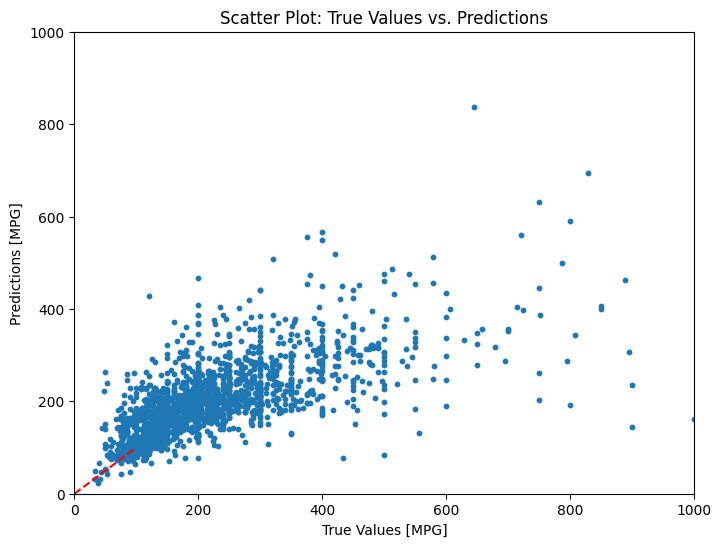

In [34]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_predictions, s=10)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.title('Scatter Plot: True Values vs. Predictions')
plt.xlim(0,1000)
plt.ylim(0,1000)
lims = [0, 100]
plt.plot(lims, lims, 'r--')


plt.show()  # Display the plot


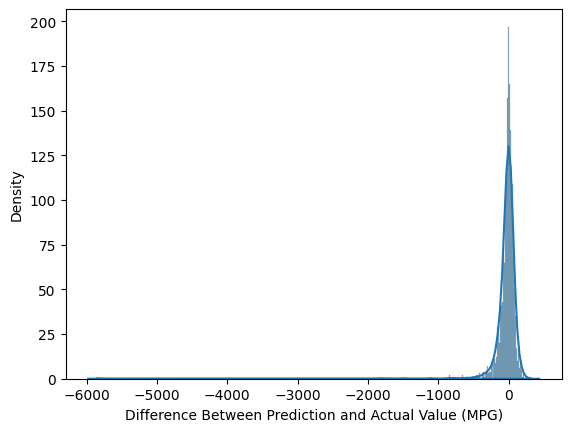

In [37]:

prediction_differences = test_predictions - y_test
sns.histplot(prediction_differences, kde=True)

sns.kdeplot(prediction_differences)


plt.xlabel('Difference Between Prediction and Actual Value (MPG)')
plt.ylabel('Density')


plt.show()

In [38]:
#from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, test_predictions)
rmse = mean_squared_error(y_test, test_predictions, squared=False)
r2 = r2_score(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
# Print the evaluation metrics

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 34635.794497622854
Root Mean Squared Error: 186.10694371146622
R-squared Score: 0.18411578220404068
Mean Absolute Error: 72.1254456386959


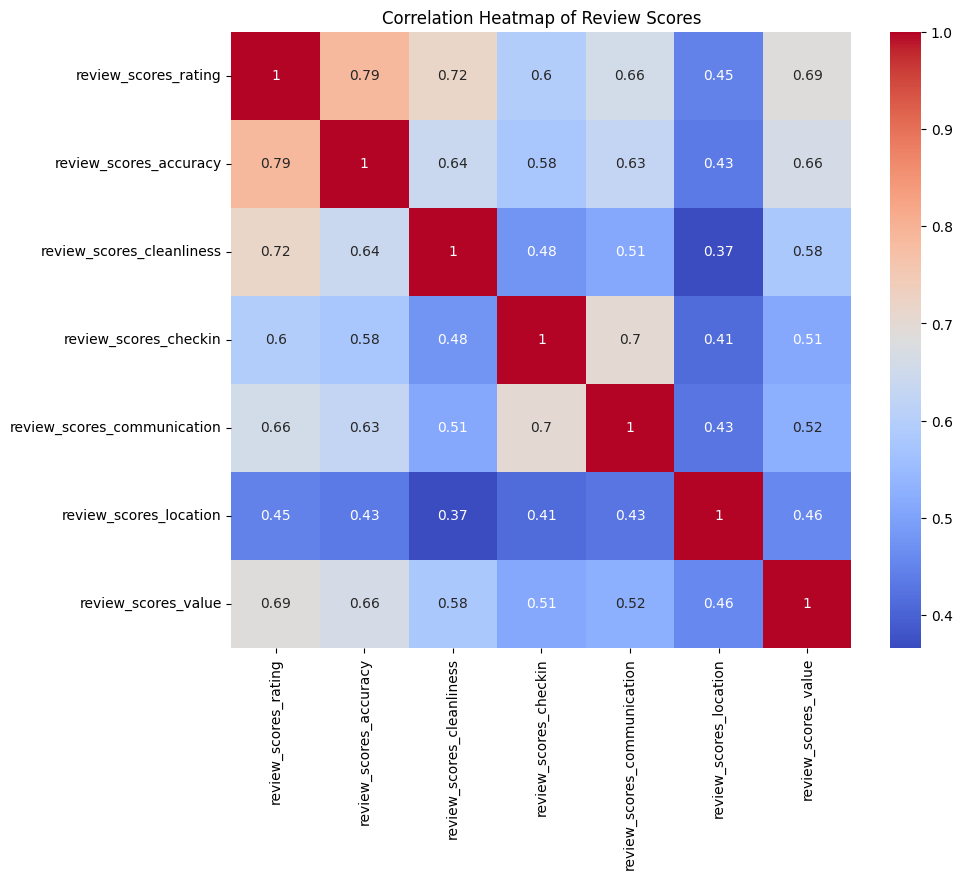

In [39]:
# @title Correlation Heatmap of Review Scores

import matplotlib.pyplot as plt
import seaborn as sns

review_scores = df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
corr_matrix = review_scores.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
_ = plt.title('Correlation Heatmap of Review Scores')

In [40]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 58.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR()
]

for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = (-scores)**0.5  # Convert negative MSE to RMSE
    print(f"{model.__class__.__name__}: RMSE = {rmse_scores.mean()}")

LinearRegression: RMSE = 381.2808800209469
Ridge: RMSE = 381.13520993448424
Lasso: RMSE = 378.87102637110746
DecisionTreeRegressor: RMSE = 573.4256946951584
RandomForestRegressor: RMSE = 453.9413042064275
SVR: RMSE = 393.71094441867103
